### 90. word2vecによる学習 

In [3]:
from gensim.models import word2vec

sentences = word2vec.Text8Corpus("EMiniMod.txt")
model = word2vec.Word2Vec(sentences, size=300, workers=4)
model.save("EwikiModel.model")

* 単語ベクトルの表示

In [8]:
print(model.wv["United_States"])

[-2.06393912e-01  1.21189542e-01  5.15397824e-02 -1.12192929e-02
 -2.25424275e-01  9.40177739e-02 -6.18328191e-02 -5.11861205e-01
  8.15755203e-02 -4.60620135e-01 -2.34110296e-01  9.09479409e-02
 -2.80084699e-01  3.28403781e-04  7.31125474e-02 -2.75330007e-01
  2.26822957e-01 -7.83573091e-01 -4.18151945e-01 -2.74345696e-01
  3.16781819e-01 -3.64591420e-01 -3.69584337e-02  6.23320758e-01
 -2.87082016e-01 -4.41314608e-01  4.81310278e-01 -1.06029417e-02
  2.26473482e-03  2.13158071e-01  1.95202809e-02 -3.78629118e-01
 -5.63467622e-01 -4.32330638e-01  2.29389202e-02  7.60519087e-01
  1.12452425e-01  5.68773866e-01  6.43652737e-01 -6.14632517e-02
  2.33381718e-01 -2.90081531e-01 -3.09063971e-01 -3.47749919e-01
 -1.70661122e-01 -2.84985691e-01  1.85274065e-01  5.34512103e-01
 -7.47415572e-02  2.93627769e-01  1.42119989e-01  1.35553241e-01
  5.46097875e-01  2.92406958e-02  5.88114023e-01  1.23438515e-01
  4.41014469e-02 -3.81040841e-01 -1.04946434e-01 -6.72234446e-02
 -8.39731172e-02 -4.73336

* 単語の類似度

In [9]:
import numpy as np
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print(cos_sim(model.wv["United_States"], model.wv["U.S"]))

0.5151273


* 類似度の高い単語10件

In [12]:
Vec_Eng = model.wv["England"]
sim_words = model.wv.most_similar([Vec_Eng], [], 10)
for word in sim_words:
    print(word)

('England', 1.0)
('Scotland', 0.8069045543670654)
('Wales', 0.7337659597396851)
('Ireland', 0.656840443611145)
('Britain', 0.6068013310432434)
('London', 0.5857164859771729)
('Liverpool', 0.5850892066955566)
('Sweden', 0.582298994064331)
('Italy', 0.5617011189460754)
('Cheshire', 0.5582116842269897)


/Users/takapen325/.pyenv/versions/anaconda3-5.2.0/envs/mainEnv/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


* 加法構成性によるアナロジー

In [15]:
Vec_Calc = model.wv["Spain"] - model.wv["Madrid"] + model.wv["Athens"]
sim_words = model.wv.most_similar([Vec_Calc], [], 10)
for word in sim_words:
    print(word)

('Spain', 0.9129788875579834)
('Italy', 0.8480401635169983)
('Austria', 0.8378344774246216)
('Denmark', 0.8369150161743164)
('Sweden', 0.8142658472061157)
('Portugal', 0.8012126684188843)
('Greece', 0.7932224273681641)
('Hungary', 0.785123348236084)
('Russia', 0.7838115692138672)
('Egypt', 0.783218502998352)


/Users/takapen325/.pyenv/versions/anaconda3-5.2.0/envs/mainEnv/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### 91. アナロジーデータの準備

In [18]:
eval_dict = {}
with open("questions-words.txt") as fr:
    for line in fr:
        line = line.rstrip()
        if line.startswith(":"):
            key = line.split()[1]
            value = []
        else :
            value.append(line)
        eval_dict[key] = value

In [21]:
print(eval_dict["family"])

['boy girl brother sister', 'boy girl brothers sisters', 'boy girl dad mom', 'boy girl father mother', 'boy girl grandfather grandmother', 'boy girl grandpa grandma', 'boy girl grandson granddaughter', 'boy girl groom bride', 'boy girl he she', 'boy girl his her', 'boy girl husband wife', 'boy girl king queen', 'boy girl man woman', 'boy girl nephew niece', 'boy girl policeman policewoman', 'boy girl prince princess', 'boy girl son daughter', 'boy girl sons daughters', 'boy girl stepbrother stepsister', 'boy girl stepfather stepmother', 'boy girl stepson stepdaughter', 'boy girl uncle aunt', 'brother sister brothers sisters', 'brother sister dad mom', 'brother sister father mother', 'brother sister grandfather grandmother', 'brother sister grandpa grandma', 'brother sister grandson granddaughter', 'brother sister groom bride', 'brother sister he she', 'brother sister his her', 'brother sister husband wife', 'brother sister king queen', 'brother sister man woman', 'brother sister nephew

### 92. アナロジーデータへの適用

In [33]:
predict_data = []
for eval_data in eval_dict["family"]:
    eval_data = eval_data.split()
    if eval_data[0] in model.wv and eval_data[1] in model.wv and eval_data[2] in model.wv and eval_data[3] in model.wv:
        Vec_Calc = model.wv[eval_data[1]] - model.wv[eval_data[0]] + model.wv[eval_data[2]]
        sim_word = model.wv.most_similar([Vec_Calc], [], 1)
        print("{} - {} + {}: \t\t {}".format(eval_data[1], eval_data[0], eval_data[2], sim_word))
    else:
        sim_word = [("", -1)]
        print("KeyError: {} - {} + {}: \t\t {}".format(eval_data[1], eval_data[0], eval_data[2], sim_word))
    predict_data.append(sim_word)

/Users/takapen325/.pyenv/versions/anaconda3-5.2.0/envs/mainEnv/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


girl - boy + brother: 		 [('brother', 0.9381650686264038)]
girl - boy + brothers: 		 [('brothers', 0.8866750001907349)]
girl - boy + dad: 		 [('girl', 0.7318710088729858)]
girl - boy + father: 		 [('father', 0.9365332126617432)]
girl - boy + grandfather: 		 [('grandmother', 0.8240213394165039)]
KeyError: girl - boy + grandpa: 		 [('', -1)]
girl - boy + grandson: 		 [('niece', 0.8044320344924927)]
girl - boy + groom: 		 [('girl', 0.7346336841583252)]
girl - boy + he: 		 [('he', 0.9610485434532166)]
girl - boy + his: 		 [('his', 0.9517828226089478)]
girl - boy + husband: 		 [('husband', 0.9431775808334351)]
girl - boy + king: 		 [('king', 0.9211826920509338)]
girl - boy + man: 		 [('man', 0.9372196793556213)]
girl - boy + nephew: 		 [('niece', 0.834793210029602)]
KeyError: girl - boy + policeman: 		 [('', -1)]
girl - boy + prince: 		 [('princess', 0.7801041007041931)]
girl - boy + son: 		 [('son', 0.9500840902328491)]
girl - boy + sons: 		 [('sons', 0.9280507564544678)]
KeyError: girl - 

granddaughter - grandson + grandfather: 		 [('grandfather', 0.9033685922622681)]
KeyError: granddaughter - grandson + grandpa: 		 [('', -1)]
bride - groom + he: 		 [('he', 0.9916244149208069)]
bride - groom + his: 		 [('his', 0.9899725317955017)]
bride - groom + husband: 		 [('husband', 0.9868667125701904)]
bride - groom + king: 		 [('king', 0.9849674701690674)]
bride - groom + man: 		 [('man', 0.983715295791626)]
bride - groom + nephew: 		 [('nephew', 0.9613611102104187)]
KeyError: bride - groom + policeman: 		 [('', -1)]
bride - groom + prince: 		 [('prince', 0.9477220177650452)]
bride - groom + son: 		 [('son', 0.9899922609329224)]
bride - groom + sons: 		 [('sons', 0.9854549169540405)]
KeyError: bride - groom + stepbrother: 		 [('', -1)]
bride - groom + stepfather: 		 [('bride', 0.8772985339164734)]
bride - groom + stepson: 		 [('bride', 0.863118052482605)]
bride - groom + uncle: 		 [('uncle', 0.9689793586730957)]
bride - groom + boy: 		 [('boy', 0.9722461700439453)]
bride - groom 

princess - prince + son: 		 [('son', 0.9719957113265991)]
princess - prince + sons: 		 [('sons', 0.9538681507110596)]
KeyError: princess - prince + stepbrother: 		 [('', -1)]
princess - prince + stepfather: 		 [('syndicated', 0.5429614782333374)]
princess - prince + stepson: 		 [('Cable', 0.5914446115493774)]
princess - prince + uncle: 		 [('uncle', 0.8672964572906494)]
princess - prince + boy: 		 [('boy', 0.8913019895553589)]
princess - prince + brother: 		 [('brother', 0.9614588022232056)]
princess - prince + brothers: 		 [('brothers', 0.9221166372299194)]
princess - prince + dad: 		 [('Flav', 0.6080875396728516)]
princess - prince + father: 		 [('father', 0.9577169418334961)]
princess - prince + grandfather: 		 [('grandfather', 0.8416734337806702)]
KeyError: princess - prince + grandpa: 		 [('', -1)]
princess - prince + grandson: 		 [('niece', 0.7996493577957153)]
princess - prince + groom: 		 [('laptop', 0.5675467252731323)]
princess - prince + he: 		 [('he', 0.9772849082946777)]
p

aunt - uncle + man: 		 [('man', 0.9370406866073608)]
aunt - uncle + nephew: 		 [('niece', 0.8489632606506348)]
KeyError: aunt - uncle + policeman: 		 [('', -1)]
aunt - uncle + prince: 		 [('prince', 0.7369094491004944)]
aunt - uncle + son: 		 [('son', 0.9756264090538025)]
aunt - uncle + sons: 		 [('sons', 0.9532886743545532)]
KeyError: aunt - uncle + stepbrother: 		 [('', -1)]
aunt - uncle + stepfather: 		 [('mobile', 0.5653184652328491)]
aunt - uncle + stepson: 		 [('nationwide', 0.5551789402961731)]


### 93. アナロジーデータの正解率の計算

In [36]:
accuracy_cnt = 0
for (eval_data, predicted) in zip(eval_dict["family"], predict_data):
    eval_data = eval_data.split()
    if eval_data[3] == predicted[0][0]:
        accuracy_cnt+=1
print("Accuracy: {}".format(accuracy_cnt/len(predict_data)))

Accuracy: 0.09288537549407115


### 94. WordSimilarity-353での類似度計算

In [86]:
with open("wordsim353/combined.tab") as fr, open("wordsim353/file94.tab", mode="w") as fw:
    for line in fr:
        line = line.rstrip()
        line = line.split("\t")
        if line[0] in model.wv and line[1] in model.wv:
            similarity = cos_sim(model.wv[line[0]], model.wv[line[1]])
        else:
            similarity = -1
        line.append(str(similarity))
        print("\t".join(line), file=fw)
        print("\t".join(line))

Word 1	Word 2	Human (mean)	-1
love	sex	6.77	0.5249794
tiger	cat	7.35	0.81336033
tiger	tiger	10.00	1.0000001
book	paper	7.46	0.5589409
computer	keyboard	7.62	0.63485754
computer	internet	7.58	0.6799734
plane	car	5.77	0.5829471
train	car	6.31	0.5904151
telephone	communication	7.50	0.5756919
television	radio	6.77	0.7807505
media	radio	7.42	0.57866496
drug	abuse	6.85	0.7043914
bread	butter	6.19	0.8571523
cucumber	potato	5.92	0.63539183
doctor	nurse	7.00	0.7421198
professor	doctor	6.62	0.59514695
student	professor	6.81	0.6553189
smart	student	4.62	0.05175925
smart	stupid	5.81	0.5470437
company	stock	7.08	0.592806
stock	market	8.08	0.7054286
stock	phone	1.62	0.36695376
stock	CD	1.31	0.295184
stock	jaguar	0.92	-0.18934762
stock	egg	1.81	0.20789531
fertility	egg	6.69	0.39496157
stock	live	3.73	0.11100322
stock	life	0.92	-0.02504722
book	library	7.46	0.31689948
bank	money	8.12	0.3430175
wood	forest	7.73	0.6215631
money	cash	9.15	0.71335936
professor	cucumber	0.31	0.14283198
king	cabbage	0.23	-0

### 95. WordSimilarity353での評価

In [95]:
#from operator import itemgetter
import pandas as pd
from scipy import stats

df = pd.read_csv('wordsim353/file94.tab', delimiter='\t')
df = df.rename(columns={"-1": "Machine", "Human (mean)": "Human"})
df = df.assign(human_order = stats.mstats.rankdata(df.Human))
df = df.assign(machine_order = stats.mstats.rankdata(df.Machine))
human_order = list(df.human_order)
machine_order = list(df.machine_order)
print(stats.spearmanr(human_order, machine_order))

SpearmanrResult(correlation=0.5227973381890357, pvalue=3.74518620718603e-26)


### 96. 国名に関するベクトルの抽出

In [125]:
import requests
from bs4 import BeautifulSoup
target_url = "https://www.nationsonline.org/oneworld/countries_of_the_world.htm"
r = requests.get(target_url)
soup = BeautifulSoup(r.text, "lxml")

import re
country_list = []
for tr in soup.find_all("tr"):
    country = []
    for td in tr.find_all("td", class_=("tdb", "tdx")):
        country.append(td.string)
    if len(country) > 0:
        country_name = str(country[0]).split()
        country_list.append(" ".join(country_name))

remove_list = ["Cocos (Keeling) Islands", "Iran (Islamic Republic of)", "Korea, Democratic People's Rep. (North Korea)",
               "Korea, Republic of (South Korea)", "Lao, People's Democratic Republic", "Macedonia, Rep. of", 'Micronesia, Federal States of',
               "Moldova, Republic of", "Slovakia (Slovak Republic)", 'Vatican City State (Holy See)', "Virgin Islands (British)", "Virgin Islands (U.S.)"]
append_list = ["Cocos Islands", "North Korea", "South Korea", "Slovak Republic", "Vatican City State", "Virgin Islands", "Isle of Man"]
for name in remove_list:
    country_list.remove(name)
for name in append_list:
    country_list.append(name)
print(country_list)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'None', 'None', 'Cook Islands', 'Costa Rica', 'None', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'None', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'G

In [126]:
from collections import OrderedDict
dict_country = OrderedDict()
for country in country_list:
    if country in model.wv:
        dict_country[country] = model.wv[country]
print("Countries: {}".format(len(country_list)))
print("In dict: {}".format(len(dict_country)))

Countries: 231
In dict: 162


### 97. k-meansクラスタリング

In [108]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(list(dict_country.values()))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [124]:
predicted_class = kmeans.predict(list(dict_country.values()))
for label, name in zip(predicted_class, list(dict_country.keys())):
    print(str(label) + ": " + name)

1: Afghanistan
0: Albania
0: Algeria
2: Andorra
0: Angola
2: Antarctica
3: Argentina
0: Armenia
4: Australia
3: Austria
0: Azerbaijan
2: Bahamas
2: Bahrain
0: Bangladesh
2: Barbados
2: Belarus
3: Belgium
2: Belize
2: Benin
2: Bermuda
2: Bhutan
0: Bolivia
2: Botswana
3: Brazil
3: Bulgaria
2: Burundi
0: Cambodia
2: Cameroon
4: Canada
2: Chad
0: Chile
4: China
0: Colombia
2: Comoros
2: None
0: Croatia
0: Cuba
0: Cyprus
3: Denmark
2: Djibouti
2: Dominica
2: Ecuador
3: Egypt
2: Eritrea
0: Estonia
0: Ethiopia
0: Fiji
3: Finland
3: France
2: Gabon
2: Gambia
0: Georgia
3: Germany
0: Ghana
2: Gibraltar
3: Greece
2: Greenland
2: Grenada
2: Guadeloupe
2: Guam
2: Guatemala
4: Guinea
2: Guinea-Bissau
2: Guyana
2: Haiti
2: Honduras
3: Hungary
0: Iceland
4: India
4: Indonesia
1: Iraq
3: Ireland
1: Israel
3: Italy
2: Jamaica
4: Japan
2: Jordan
2: Kazakhstan
0: Kenya
2: Kiribati
0: Kosovo
2: Kuwait
2: Kyrgyzstan
0: Latvia
0: Lebanon
2: Lesotho
2: Liberia
0: Libya
2: Liechtenstein
0: Lithuania
2: Luxemb

### 98. Ward法によるクラスタリング

Text(0,0.5,'Clustering distance')

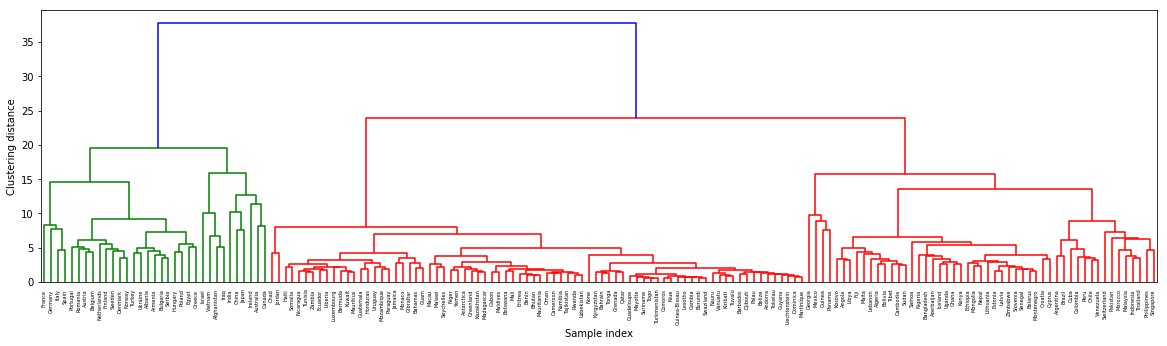

In [115]:
from scipy.cluster.hierarchy import dendrogram, ward
%matplotlib inline
import matplotlib.pyplot as plt

linkage_array = ward(list(dict_country.values()))
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, labels=list(dict_country.keys()))
plt.xlabel("Sample index")
plt.ylabel("Clustering distance")

### 99. t-SNEによる可視化

Text(0,0.5,'t-SNE feature 1')

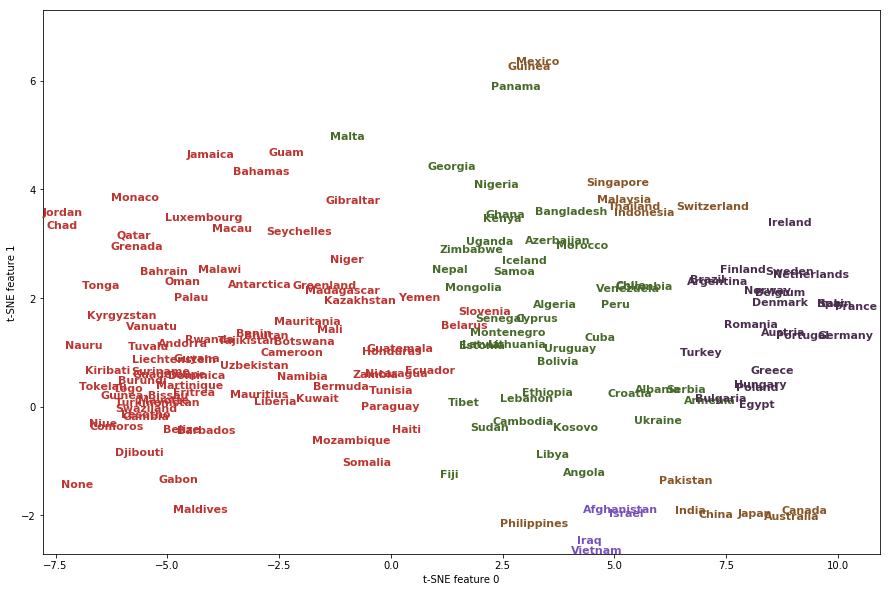

In [122]:
from sklearn.manifold import TSNE
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525"]
tsne = TSNE(random_state=42)
country_tsne = tsne.fit_transform(list(dict_country.values()))
plt.figure(figsize=(15, 10))
plt.xlim(country_tsne[:, 0].min(), country_tsne[:, 0].max() + 1)
plt.ylim(country_tsne[:, 1].min(), country_tsne[:, 1].max() + 1)
for i, (name, label) in enumerate(zip(list(dict_country.keys()), predicted_class)):
    plt.text(country_tsne[i, 0], country_tsne[i, 1], str(name), color = colors[label], fontdict={"weight": "bold", "size": 11})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")